# Text Classification with Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]  # Retain only necessary columns
df.columns = ['label', 'message']  # Rename columns


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


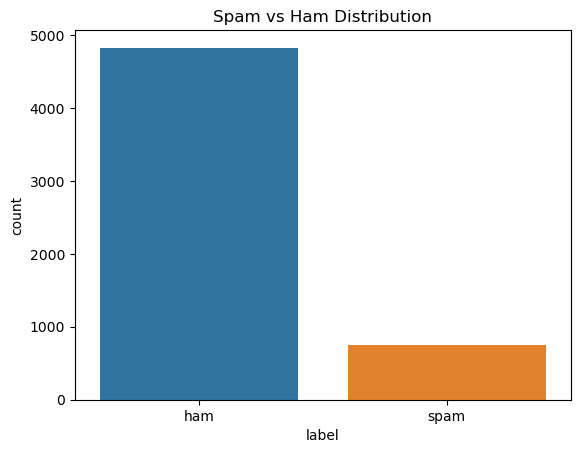

In [5]:
# Check dataset information
print(df.head())
print(df['label'].value_counts())  # Check label distribution

# Visualize label distribution
sns.countplot(data=df, x='label')
plt.title('Spam vs Ham Distribution')
plt.show()


In [6]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_message'] = df['message'].apply(preprocess_text)


In [7]:
# Split data into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)


Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.68      0.80       150

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



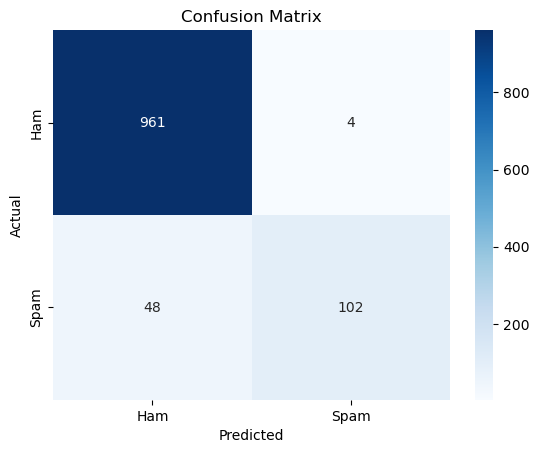

Model Accuracy: 95.34%


In [10]:
# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [11]:
# Test model with custom messages
test_messages = [
    "Congratulations! You've won a free gift card worth $500. Claim now!",
    "Hi, can we meet tomorrow for lunch?",
    "Your account will be suspended if you don't provide payment information immediately."
]

# Preprocess and vectorize
test_messages_cleaned = [preprocess_text(msg) for msg in test_messages]
test_messages_vectorized = vectorizer.transform(test_messages_cleaned)

# Predict
test_predictions = model.predict(test_messages_vectorized)
print("Test Message Predictions:")
for msg, label in zip(test_messages, test_predictions):
    print(f"Message: {msg}\nPrediction: {label}\n")


Test Message Predictions:
Message: Congratulations! You've won a free gift card worth $500. Claim now!
Prediction: spam

Message: Hi, can we meet tomorrow for lunch?
Prediction: ham

Message: Your account will be suspended if you don't provide payment information immediately.
Prediction: ham

